In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset("mpg")

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
df.describe(include="object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


<AxesSubplot:xlabel='origin', ylabel='count'>

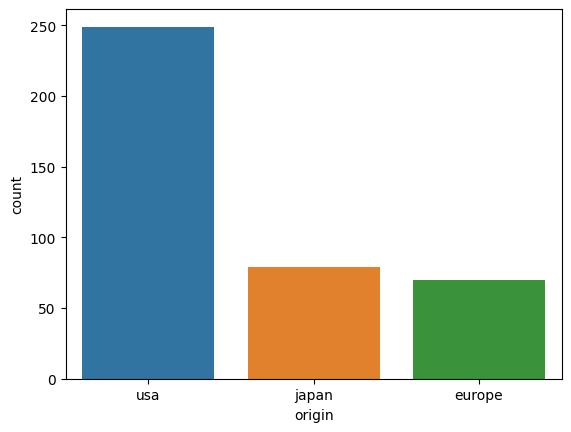

In [5]:
sns.countplot(data=df,x="origin")

<AxesSubplot:xlabel='count', ylabel='origin'>

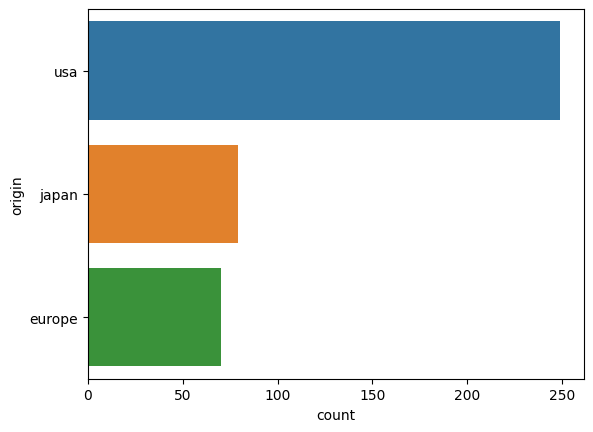

In [6]:
sns.countplot(data=df,y="origin")

In [7]:
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

<AxesSubplot:xlabel='cylinders', ylabel='count'>

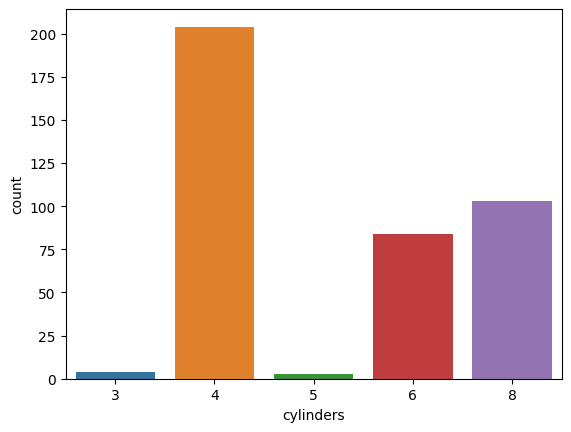

In [8]:
sns.countplot(data=df,x="cylinders")

In [9]:
df["cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='model_year', ylabel='count'>

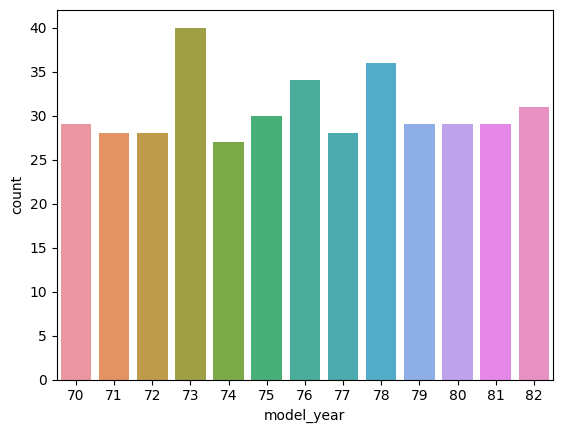

In [10]:
sns.countplot(data=df,x="model_year")

<AxesSubplot:xlabel='origin', ylabel='count'>

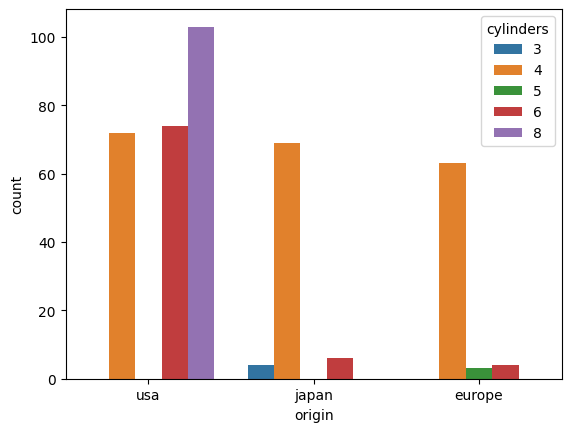

In [13]:
sns.countplot(data=df,x="origin",hue="cylinders")

<AxesSubplot:xlabel='cylinders', ylabel='count'>

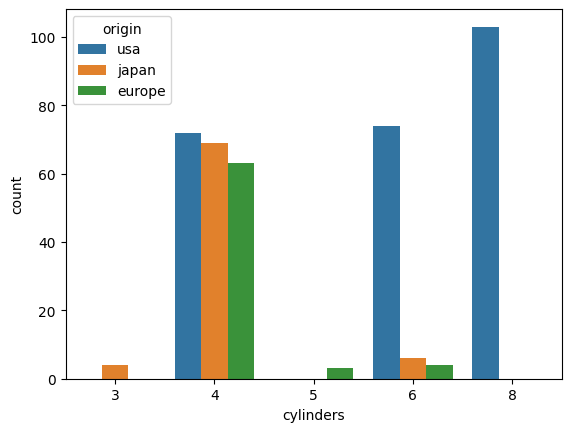

In [14]:
sns.countplot(data=df,x="cylinders",hue="origin")

In [17]:
pd.crosstab(df["origin"],df["cylinders"])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


<AxesSubplot:xlabel='origin', ylabel='mpg'>

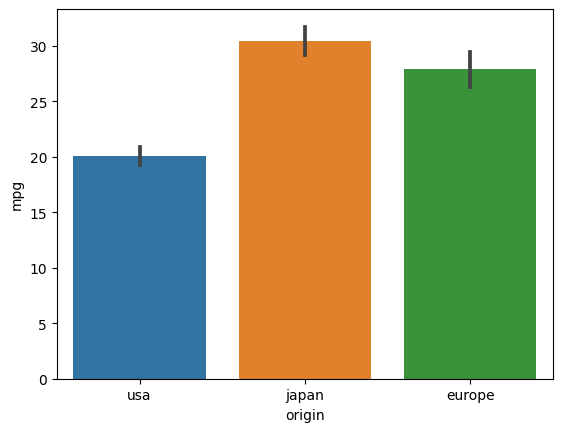

In [20]:
#막대그래프(범주형으로 나누기 좋음)
# 검은색 선은 신뢰구간(기본 95%로 지정)
sns.barplot(data=df,x="origin",y="mpg")

C:\Users\KB\AppData\Local\Temp\ipykernel_5564\303948201.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x="origin",y="mpg",ci=None)


<AxesSubplot:xlabel='origin', ylabel='mpg'>

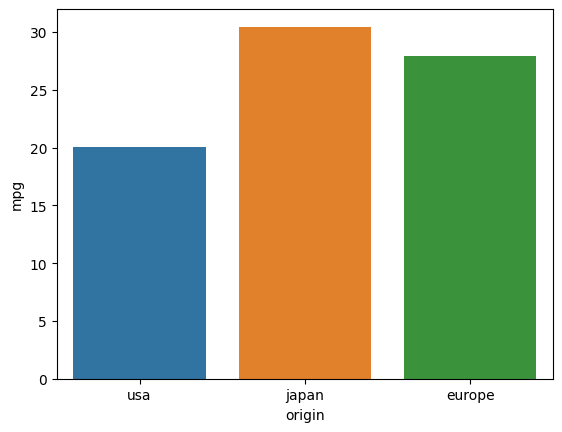

In [21]:
sns.barplot(data=df,x="origin",y="mpg",ci=None)
#ci대신 errorbar로 하면 오류 가능성 낮음

<AxesSubplot:xlabel='origin', ylabel='mpg'>

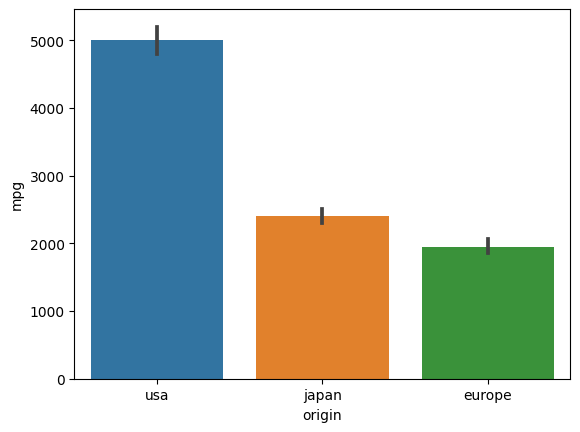

In [24]:
#합계 - 기본은 평균(mean)
sns.barplot(data=df,x="origin",y="mpg",estimator="sum")

In [26]:
df.groupby("origin").mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [27]:
df.groupby("origin")["mpg"].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [28]:
pd.pivot_table(data=df,index="origin",values="mpg")

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


In [29]:
pd.pivot_table(data=df,index="cylinders",values="mpg")

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


<AxesSubplot:xlabel='origin', ylabel='mpg'>

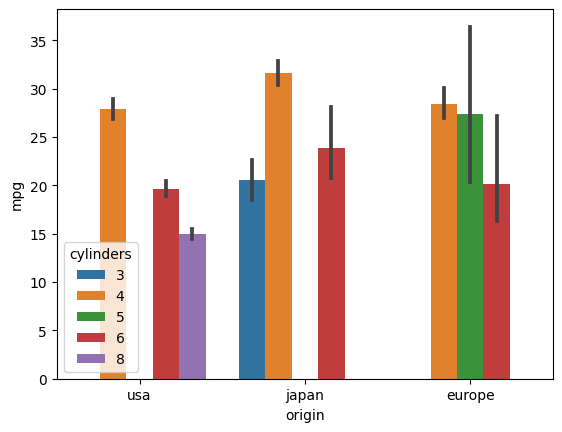

In [30]:
sns.barplot(data=df,x="origin",y="mpg",hue="cylinders")

In [34]:
pd.pivot_table(data=df,index="cylinders",columns="origin",values="mpg")

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


<AxesSubplot:xlabel='origin', ylabel='mpg'>

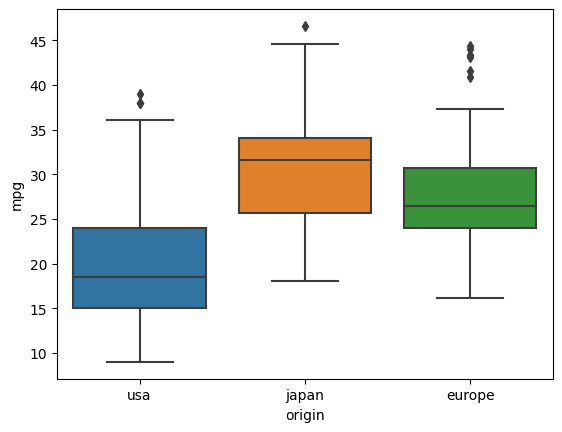

In [35]:
sns.boxplot(data=df,x="origin",y="mpg")

In [36]:
df.groupby("origin")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [37]:
origin_des=df.groupby("origin")["mpg"].describe()
origin_des 

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [38]:
#행만 가져 올때 Loc
df.loc[1]

mpg                          15.0
cylinders                       8
displacement                350.0
horsepower                  165.0
weight                       3693
acceleration                 11.5
model_year                     70
origin                        usa
name            buick skylark 320
Name: 1, dtype: object

In [39]:
ori

NameError: name 'ori' is not defined

In [40]:
origin_des.loc["japan"]

count    79.000000
mean     30.450633
std       6.090048
min      18.000000
25%      25.700000
50%      31.600000
75%      34.050000
max      46.600000
Name: japan, dtype: float64

<AxesSubplot:xlabel='origin', ylabel='mpg'>

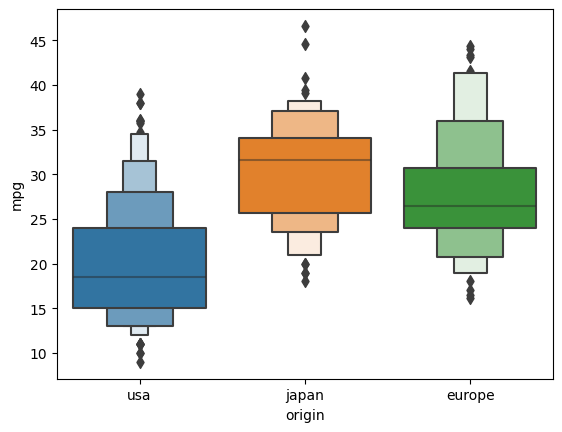

In [41]:
sns.boxenplot(data=df,x="origin",y="mpg")

<AxesSubplot:xlabel='origin', ylabel='mpg'>

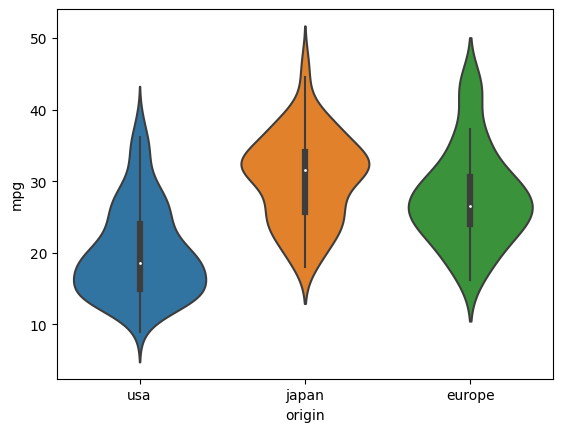

In [43]:
sns.violinplot(data=df,x="origin",y="mpg")

<AxesSubplot:xlabel='origin', ylabel='mpg'>

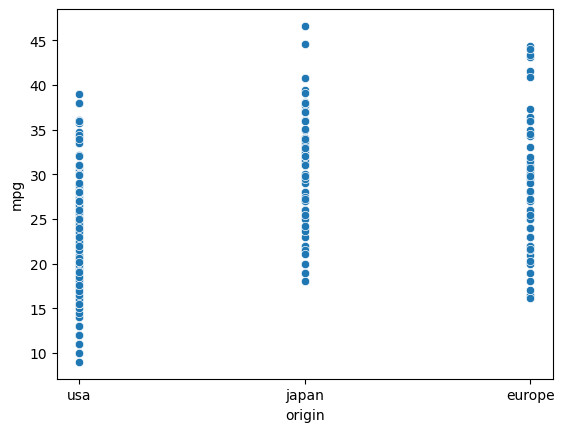

In [44]:
sns.scatterplot(data=df,x="origin",y="mpg")

<AxesSubplot:xlabel='origin', ylabel='mpg'>

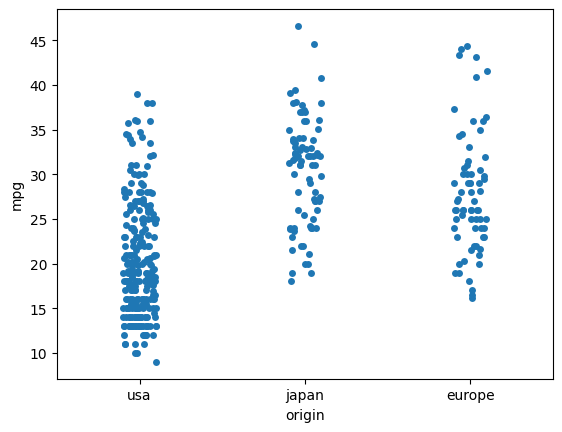

In [45]:
sns.stripplot(data=df,x="origin",y="mpg")

<AxesSubplot:xlabel='origin', ylabel='mpg'>

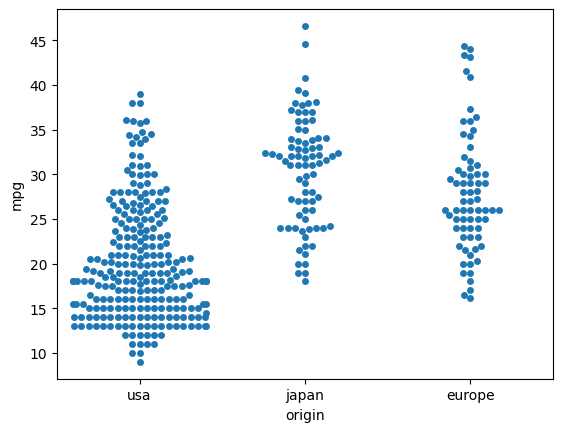

In [46]:
sns.swarmplot(data=df,x="origin",y="mpg")

<AxesSubplot:xlabel='origin', ylabel='mpg'>

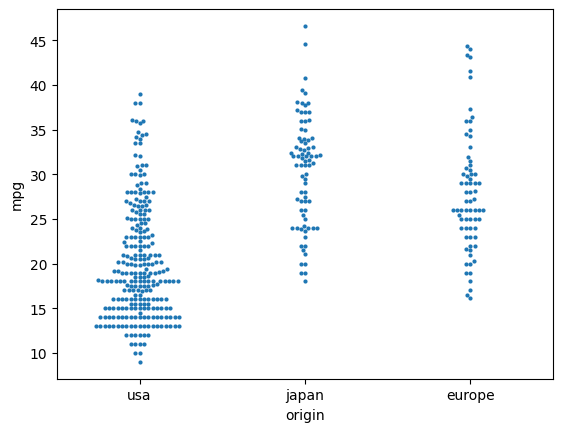

In [47]:
sns.swarmplot(data=df,x="origin",y="mpg",size=3)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

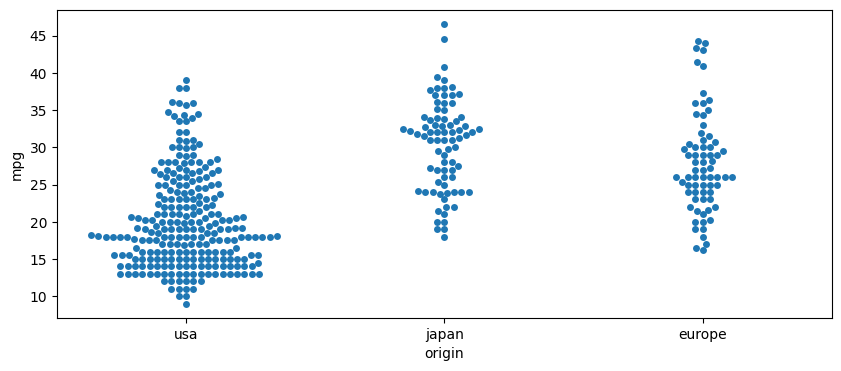

In [51]:
#plt에서(임포트확인) 도표의 사이즈를 지정할 수 있는 메소드 포함
plt.figure(figsize=(10,4))
sns.swarmplot(data=df,x="origin",y="mpg")

<AxesSubplot:xlabel='origin', ylabel='mpg'>

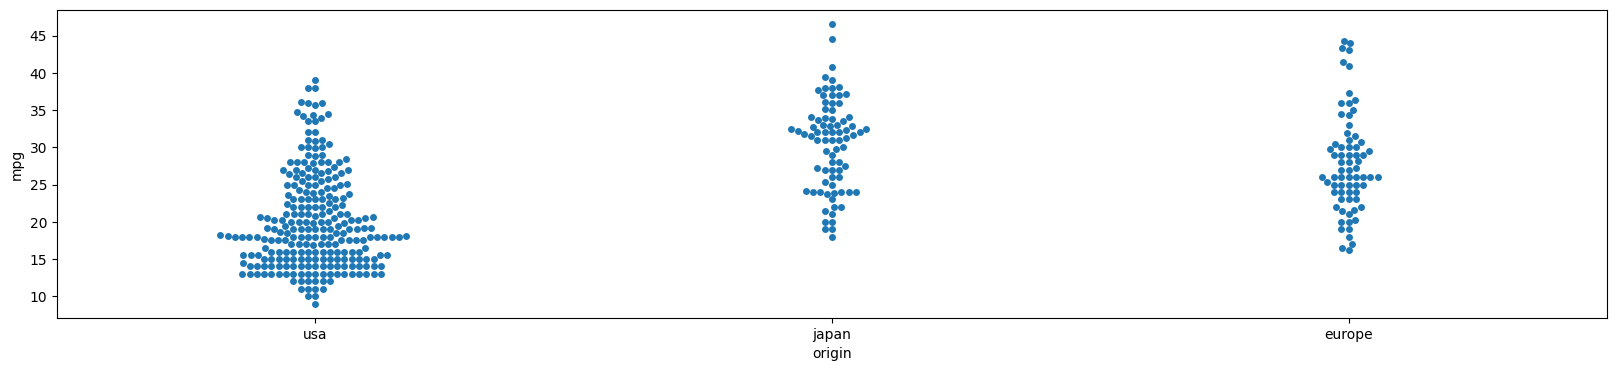

In [52]:
#(가로,세로)
plt.figure(figsize=(20,4))
sns.swarmplot(data=df,x="origin",y="mpg")

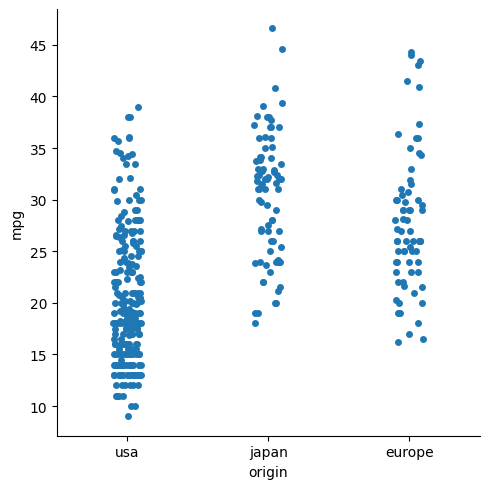

In [54]:
sns.catplot(data=df,x="origin",y="mpg")

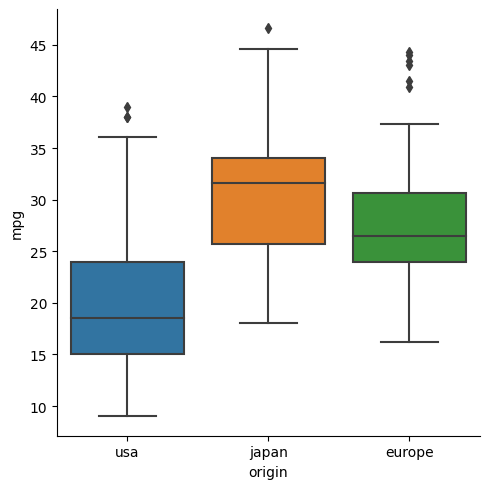

In [56]:
sns.catplot(data=df,x="origin",y="mpg",kind="box")

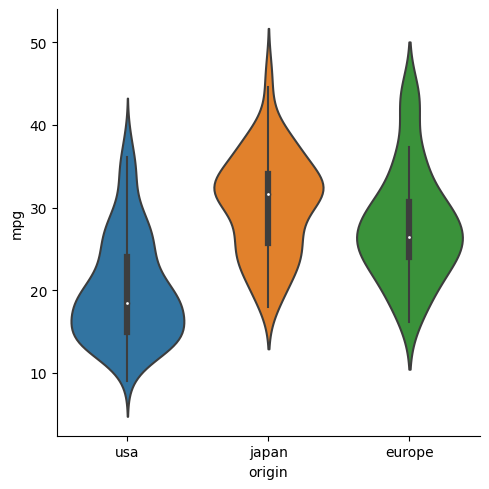

In [57]:
#kind = strip, swarm, box, violin,point, bar   -> 가능
sns.catplot(data=df,x="origin",y="mpg",kind="violin")

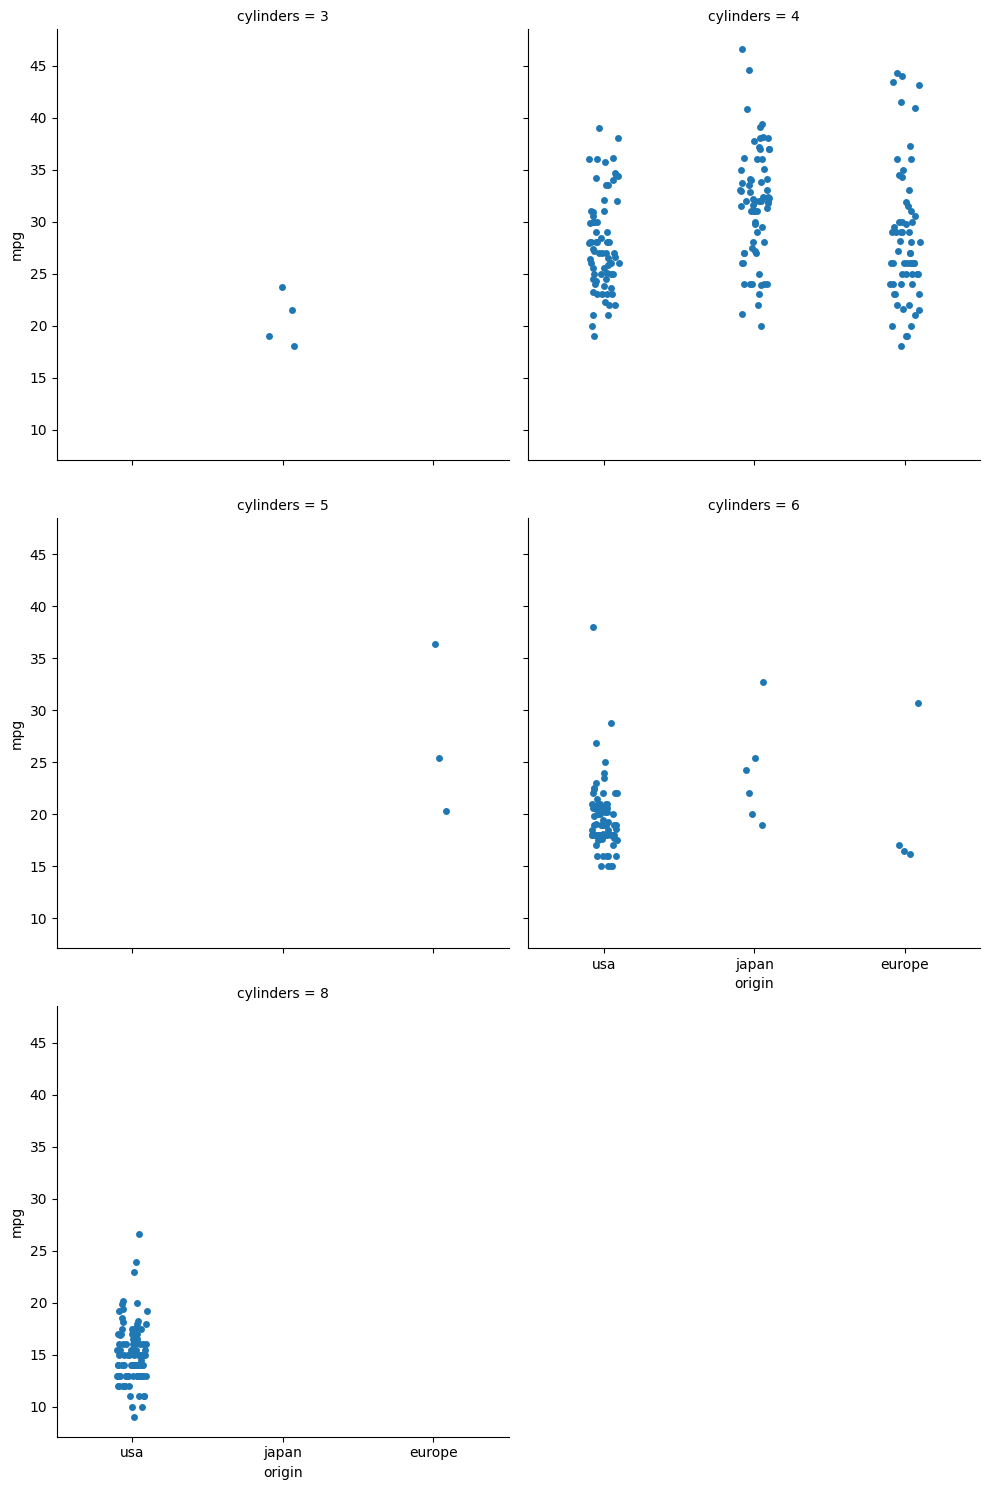

In [61]:
sns.catplot(data=df,x="origin",y="mpg",col="cylinders",col_wrap=2)